In [333]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind

In [334]:
mydata=pd.read_csv('C:/Users/nicky/Downloads/Wholesale+Customers+Data.csv')


In [335]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


# Question 1.1

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
mydata.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [104]:
channel=mydata.groupby('Channel',as_index=False).sum()
channel

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [105]:
channel['total sum']=channel.sum(axis=1)
channel

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total sum
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,8070603
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6645917


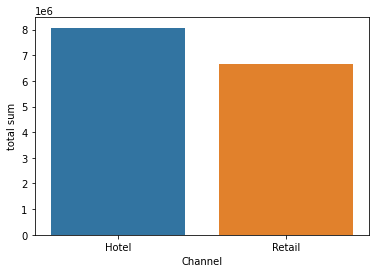

In [117]:
sns.barplot(x='Channel',y='total sum',data=channel);

In channel Hotels spend maximum and Retails spend minimum

In [110]:
region=mydata.groupby('Region',as_index=False).sum()



In [111]:
region['total sum']=region.sum(axis=1)
region

,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total sum
0,Lisbon,18095,854833,422454,570037,231026,204136,104327,2404908
1,Oporto,14899,464721,239144,433274,190132,173311,54506,1569987
2,Other,64026,3960577,1888759,2495251,930492,890410,512110,10741625


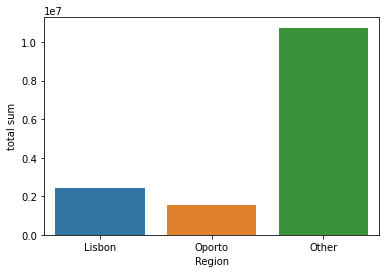

In [114]:
sns.barplot(x='Region',y='total sum',data=region)

In Region Other spends maximum and Oporto spends minimum

# Question 1.2

In [157]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [169]:
print(mydata['Channel'].unique())
print(mydata['Region'].unique())

['Retail' 'Hotel']
['Other' 'Lisbon' 'Oporto']


In [177]:
retail_other_df=mydata.loc[(mydata['Channel']=='Retail') & (mydata['Region']=='Other')]
retail_other_df.describe()


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,152.438095,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524
std,138.867530,9635.394129,10574.827178,12298.935356,1504.498737,6022.091110,2119.052222
min,1.000000,23.000000,1124.000000,4523.000000,33.000000,523.000000,3.000000
25%,46.000000,2343.000000,6128.000000,9170.000000,437.000000,3537.000000,545.000000
50%,101.000000,7362.000000,7845.000000,12121.000000,1059.000000,5121.000000,1386.000000
75%,194.000000,15076.000000,11114.000000,19805.000000,2194.000000,7677.000000,2158.000000
max,438.000000,44466.000000,73498.000000,92780.000000,8132.000000,40827.000000,16523.000000


Conclusion- Across retail and other region milk and fresh mean sale of fresh and milk are little similiar while other products are not showing any similiarity.

In [181]:
retail_lisbon_df=mydata.loc[(mydata['Channel']=='Retail') & (mydata['Region']=='Lisbon')]
retail_lisbon_df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,226.055556,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444
std,23.725073,5415.521495,6609.221463,10414.687844,2424.774577,5515.878798,1626.486667
min,198.000000,18.000000,2527.000000,5265.000000,61.000000,788.000000,120.000000
25%,208.500000,2378.250000,6253.250000,10634.250000,923.500000,4818.250000,746.000000
50%,218.000000,2926.000000,8866.000000,16106.000000,1522.000000,6177.000000,1414.000000
75%,242.250000,5988.000000,13112.250000,23478.750000,3843.000000,11804.750000,2456.500000
max,269.000000,20782.000000,28326.000000,39694.000000,8321.000000,19410.000000,6372.000000


Conclusion-Across retail and Lisbon region all products are not behaving similiar. Mean sale of grocery is maximum and mean sale of delicatessen in minimum

In [183]:
retail_oporto_df=mydata.loc[(mydata['Channel']=='Retail') & (mydata['Region']=='Oporto')]
retail_oporto_df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,311.105263,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000
std,13.904015,6867.934548,6611.354136,14035.453775,2473.266471,8286.748255,1065.438042
min,294.000000,161.000000,928.000000,2743.000000,131.000000,332.000000,59.000000
25%,301.500000,2368.000000,4148.500000,9318.500000,639.500000,3900.000000,392.500000
50%,306.000000,6468.000000,6817.000000,12469.000000,934.000000,6236.000000,1037.000000
75%,318.000000,9162.000000,13127.500000,19785.500000,1410.000000,9837.500000,1815.000000
max,336.000000,27082.000000,25071.000000,67298.000000,11559.000000,38102.000000,3508.000000


Conclusion- in retail and oporto region mean expenditure on milk and detergent_paper are almost equal and expenditure on delicatessen and frozen items are almost equal.

In [186]:
hotel_other_df=mydata.loc[(mydata['Channel']=='Hotel') & (mydata['Region']=='Other')]
hotel_other_df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,227.582938,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360
std,139.651493,14746.572913,4508.505269,3593.506056,4956.590848,1099.970640,3663.183304
min,4.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,113.500000,3702.500000,1188.500000,1666.000000,779.000000,176.500000,378.500000
50%,182.000000,9612.000000,2247.000000,2642.000000,1960.000000,375.000000,823.000000
75%,375.500000,18821.000000,4205.000000,4927.500000,4542.500000,948.500000,1582.000000
max,440.000000,112151.000000,43950.000000,21042.000000,36534.000000,6907.000000,47943.000000


Conclusion- in Hotels and other region milk, grocery and frozen items are showing some similiarities

In [188]:
hotel_lisbon_df=mydata.loc[(mydata['Channel']=='Hotel') & (mydata['Region']=='Lisbon')]
hotel_lisbon_df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,237.728814,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542
std,21.411269,12342.008901,4298.321195,3629.644143,3276.460124,1305.907616,1219.945304
min,197.000000,514.000000,258.000000,489.000000,91.000000,5.000000,7.000000
25%,221.500000,4437.500000,1071.000000,1620.000000,966.000000,237.000000,374.000000
50%,239.000000,8656.000000,2280.000000,2576.000000,1859.000000,412.000000,749.000000
75%,255.500000,18135.000000,4995.500000,5172.500000,4479.000000,874.000000,1621.500000
max,273.000000,56083.000000,23527.000000,16966.000000,18711.000000,5828.000000,6854.000000


Conclusion- in Hotels and Lisbon region milk,grocery and frozen items are showing some similiarities.

In [190]:
hotel_oporto_df=mydata.loc[(mydata['Channel']=='Hotel') & (mydata['Region']=='Oporto')]
hotel_oporto_df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,28.00000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,321.00000,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857
std,12.26256,8969.362752,2968.628697,3048.298815,11454.478518,425.310506,1056.778800
min,295.00000,3.000000,333.000000,1330.000000,264.000000,15.000000,51.000000
25%,313.50000,4938.250000,1146.000000,2373.750000,962.250000,182.750000,567.250000
50%,322.50000,9787.000000,1560.500000,3352.000000,2696.500000,325.000000,883.000000
75%,329.25000,17031.500000,2344.750000,5527.500000,4617.000000,707.000000,1146.000000
max,340.00000,32717.000000,16784.000000,13626.000000,60869.000000,1679.000000,5609.000000


Conclusion- in Hotel and oporto region none of the items are showing any similiarities. Mean expenditure on fresh items are maximum and detergents_paper are minimum

# Question 1.3

In [193]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [192]:
mydata.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Based on std,IQR,min and max 'Fresh' shows the most inconsistent behaviour and 'Delicatessen shows the least inconsistent behaviour

# Question 1.4

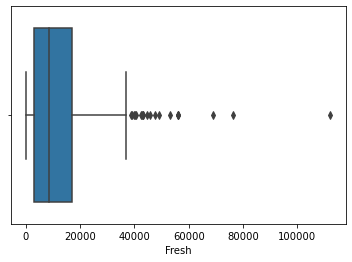

In [194]:
sns.boxplot(mydata['Fresh'])

There are outliers in 'Fresh'

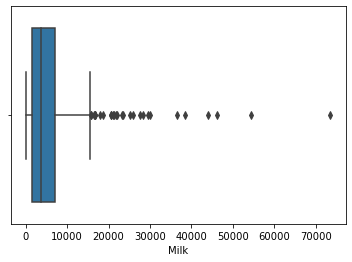

In [195]:
sns.boxplot(mydata['Milk'])

There are outliers in 'Milk'

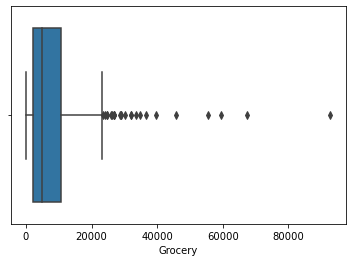

In [197]:
sns.boxplot(mydata['Grocery'])

There are outliers in 'Grocery'

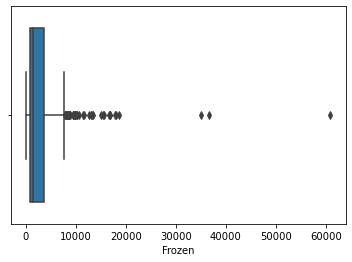

In [198]:
sns.boxplot(mydata['Frozen'])

There are outliers in 'Frozen'

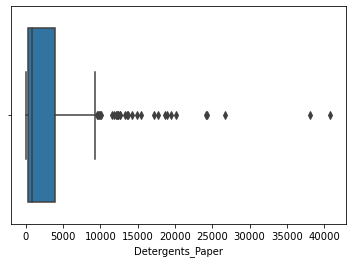

In [199]:
sns.boxplot(mydata['Detergents_Paper'])

There are outliers in 'Detergents_Paper'

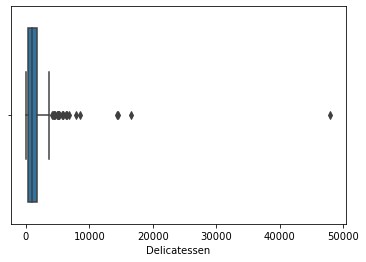

In [200]:
sns.boxplot(mydata['Delicatessen'])

There are outliers in 'Delicatessen'

# Question 1.5

# Question 2.1

In [21]:
cmsu_data=pd.read_csv('C:/Users/nicky/Downloads/Survey-1.csv')

In [22]:
cmsu_data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


# 2.1.1

In [23]:
pd.crosstab(cmsu_data['Gender'],cmsu_data['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


# 2.1.2

In [25]:
pd.crosstab(cmsu_data['Gender'],cmsu_data['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


# 2.1.3

In [26]:
pd.crosstab(cmsu_data['Gender'],cmsu_data['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


# 2.1.4

In [28]:
pd.crosstab(cmsu_data['Gender'],cmsu_data['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# Question 2.2

In [214]:
cmsu_data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [139]:
values=cmsu_data['Gender'].value_counts()
print(values)

Female    33
Male      29
Name: Gender, dtype: int64


In [140]:
Total=values.sum()
print(Total)


62


# 2.2.1

In [155]:
probability_male=(values['Male']/Total).round(2)
print(probability_male)
print('probability that a randomly selected CMSU student will be male =',probability_male)

0.47
probability that a randomly selected CMSU student will be male = 0.47


# 2.2.2

In [156]:
probability_female=(values['Female']/Total).round(2)
print(probability_female)
print('probability that a randomly selected CMSU student will be female =',probability_female)

0.53
probability that a randomly selected CMSU student will be female = 0.53


# Question 2.3

In [201]:
cmsu_data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


# 2.3.1

In [248]:
male_data=cmsu_data[(cmsu_data['Gender']=='Male')]
print(male_data.head())
total_male=male_data['Gender'].value_counts()
print(total_male)

    ID Gender  Age   Class       Major Grad Intention  GPA  Employment  \
1    2   Male   23  Senior  Management            Yes  3.6   Part-Time   
2    3   Male   21  Junior       Other            Yes  2.5   Part-Time   
3    4   Male   21  Junior         CIS            Yes  2.5   Full-Time   
4    5   Male   23  Senior       Other      Undecided  2.8  Unemployed   
11  12   Male   21  Senior   Undecided             No  3.5   Full-Time   

    Salary  Social Networking  Satisfaction  Spending Computer  Text Messages  
1     25.0                  1             4       360   Laptop             50  
2     45.0                  2             4       600   Laptop            200  
3     40.0                  4             6       600   Laptop            250  
4     40.0                  2             4       500   Laptop            100  
11    37.0                  2             3       500   Laptop            100  
Male    29
Name: Gender, dtype: int64


In [246]:
male_major=pd.crosstab(male_data['Gender'],male_data['Major'])
male_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Male,4,1,4,2,6,4,5,3


In [253]:
male_accounting=(male_major['Accounting']/total_male).round(2)
male_accounting

Gender
Male    0.14
dtype: float64

In [257]:
male_CIS=(male_major['CIS']/total_male).round(2)
male_CIS

Gender
Male    0.03
dtype: float64

In [260]:
male_economics_finance=(male_major['Economics/Finance']/total_male).round(2)
male_economics_finance

Gender
Male    0.14
dtype: float64

In [262]:
male_international_business=(male_major['International Business']/total_male).round(2)
male_international_business

Gender
Male    0.07
dtype: float64

In [264]:
male_management=(male_major['Management']/total_male).round(2)
male_management

Gender
Male    0.21
dtype: float64

In [265]:
male_other=(male_major['Other']/total_male).round(2)
male_other

Gender
Male    0.14
dtype: float64

In [269]:
male_retailing_marketing=(male_major['Retailing/Marketing']/total_male).round(2)
male_retailing_marketing

Gender
Male    0.17
dtype: float64

In [271]:
male_undecided=(male_major['Undecided']/total_male).round(2)
male_undecided

Gender
Male    0.1
dtype: float64

# 2.3.2

In [279]:
female_data=cmsu_data[(cmsu_data['Gender']=='Female')]
print(female_data.head())
total_female=female_data['Gender'].value_counts()
print(total_female)

   ID  Gender  Age   Class              Major Grad Intention  GPA  Employment  \
0   1  Female   20  Junior              Other            Yes  2.9   Full-Time   
5   6  Female   22  Senior  Economics/Finance      Undecided  2.3  Unemployed   
6   7  Female   21  Junior              Other      Undecided  3.0   Part-Time   
7   8  Female   22  Senior              Other      Undecided  3.1   Full-Time   
8   9  Female   20  Junior         Management            Yes  3.6  Unemployed   

   Salary  Social Networking  Satisfaction  Spending Computer  Text Messages  
0    50.0                  1             3       350   Laptop            200  
5    78.0                  3             2       700   Laptop             30  
6    50.0                  1             3       500   Laptop             50  
7    80.0                  1             2       200   Tablet            300  
8    30.0                  0             4       500   Laptop            400  
Female    33
Name: Gender, dtype: int64

In [278]:
female_major=pd.crosstab(female_data['Gender'],female_data['Major'])
female_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing
Gender,,,,,,,
Female,3,3,7,4,4,3,9


In [281]:
female_accounting=(female_major['Accounting']/total_female).round(2)
female_accounting

Gender
Female    0.09
dtype: float64

In [282]:
female_CIS=(female_major['CIS']/total_female).round(2)
female_CIS

Gender
Female    0.09
dtype: float64

In [284]:
female_economics_finance=(female_major['Economics/Finance']/total_female).round(2)
female_economics_finance

Gender
Female    0.21
dtype: float64

In [285]:
female_international_business=(female_major['International Business']/total_female).round(2)
female_international_business

Gender
Female    0.12
dtype: float64

In [287]:
female_management=(female_major['Management']/total_female).round(2)
female_management

Gender
Female    0.12
dtype: float64

In [289]:
female_other=(female_major['Other']/total_female).round(2)
female_other

Gender
Female    0.09
dtype: float64

In [291]:
female_retailing_marketing=(female_major['Retailing/Marketing']/total_female).round(2)
female_retailing_marketing

Gender
Female    0.27
dtype: float64

# Question 2.6

In [364]:
cmsu_data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [371]:
gender_grad=pd.crosstab(cmsu_data['Gender'],cmsu_data['Grad Intention'])
gender_grad
gender_grad.drop('Undecided',axis=1,inplace=True)
gender_grad

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


# Question 2.8

# 2.8.1

In [358]:
cmsu_data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


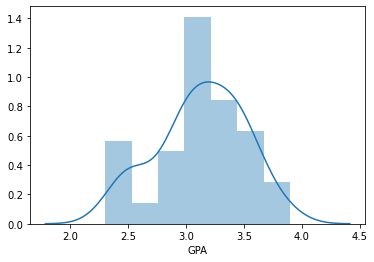

In [359]:
sns.distplot(cmsu_data['GPA'])

GPA is almost following normal distribution

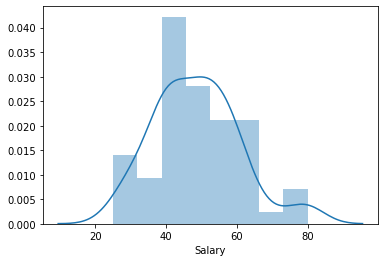

In [360]:
sns.distplot(cmsu_data['Salary'])

Salary is almost following normal distribution

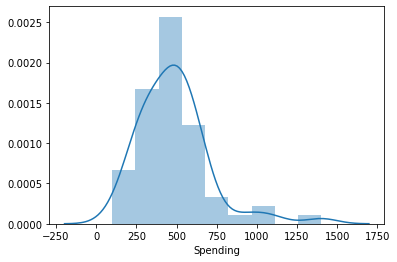

In [361]:
sns.distplot(cmsu_data['Spending'])

Spending is not following normal distribution and it is right skewed

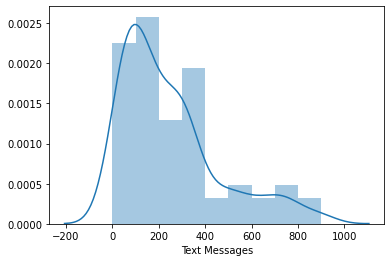

In [362]:
sns.distplot(cmsu_data['Text Messages'])

Text messages are not following normal distribution and it is right skewed

# Question 3.1

In [294]:
shingles=pd.read_csv('C:/Users/nicky/Downloads/A+&+B+shingles.csv')


In [336]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


Shingles A

Hypothesis
HA:mean moisture content>0.35
H0:mean moisture content<=0.35

In [346]:
shingles_A=pd.DataFrame(shingles['A'])
shingles_A.head()

,A
0,0.44
1,0.61
2,0.47
3,0.30
4,0.15


In [344]:
t_statistics,p_value=ttest_1samp(shingles_A,0.35)
t_statistics,p_value

(array([-1.47350463]), array([0.14955266]))

In [345]:
p_value<0.05

array([False])

As p_value is not less than 0.05 null hypothesis is not rejected and the mean moisture content of shingles A is less than 0.35

Shingles B

Hypothesis
HA:mean moisture content>0.35
H0:mean moisture content<=0.35

In [348]:
shingles_B=pd.DataFrame(shingles['B'])
shingles_B

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37
5,0.18
6,0.42
7,0.58
8,0.25
9,0.41


In [350]:
t_statistics,p_value=ttest_1samp(shingles_B,0.35)
t_statistics,p_value

(array([-3.10033131]), array([0.00418095]))

In [351]:
p_value<0.05

array([ True])

As p_value is less than 0.05 null hypothesis is rejected and the mean moisture content of shingles B is not less than 0.35

# Question 3.2

Hypothesis
HA=population mean of shinglesA = shinglesB
H0=population mean of shinglesA != shingles B

In [353]:
shingles

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [356]:
t_statistics,p_value=ttest_ind(shingles['A'],shingles['B'],nan_policy='omit')
t_statistics,p_value

(1.289628271966112, 0.2017496571835328)

In [357]:
p_value<0.05

False

as p_value is not less than 0.05 null hypothesis is not rejected and mean population of shingles A and shingles B are equal

Before performing the test of equality we have to assume there are equal numbers of reading for both the samples